# Preparando el conjunto de imágenes para aplicar PCA

In [2]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
im = imageio.imread("./imagenes/s3/3.pgm")
im = im.astype(np.uint8)

print(im)


[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [4]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [5]:
im_original = im

# normalizamos la imagen
# 255 porque es el maximo valor que puede tomar la imagen
im = im / 255

In [6]:
print('Max original', end=' ')
print(np.amax(im))
print('Min original', end=' ')
print(np.amin(im))


Max original 0.8
Min original 0.0392156862745098


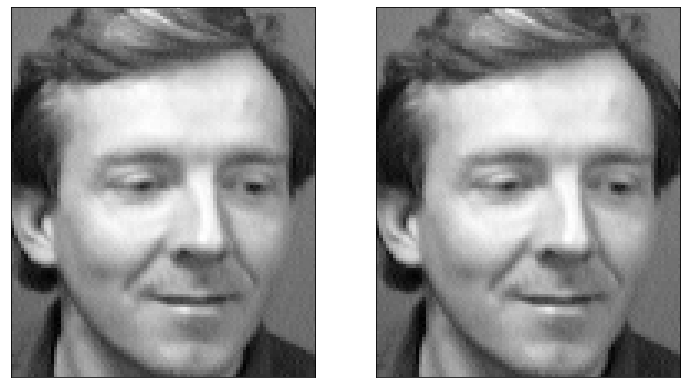

In [7]:
fix, ax = plt.subplots(
  1,
  2,
  figsize=(12, 12),
  subplot_kw={'xticks': [], 'yticks': []}
)

ax[0].imshow(im_original, cmap='gray')
ax[1].imshow(im, cmap='gray')


In [8]:
# from glob import iglob
# 
# list(iglob('./imagenes/*/*.pgm'))


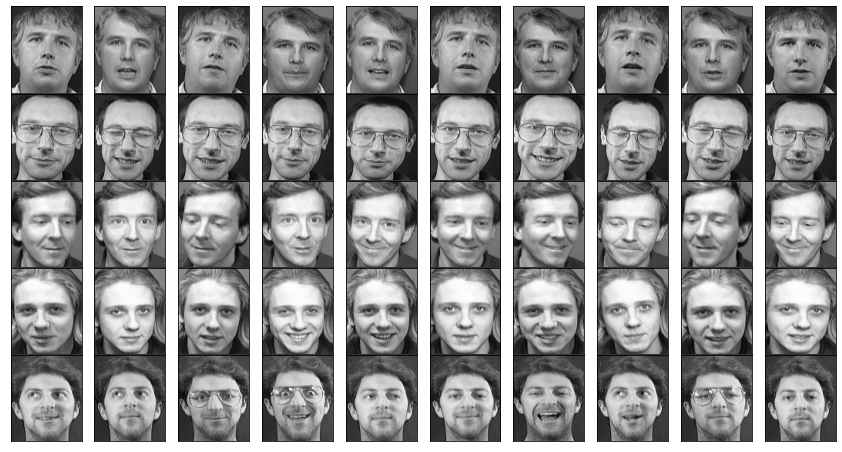

In [9]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('./imagenes/*/*.pgm'):
  pass
  im = imageio.imread(path)
  cara = pd.Series(im.flatten(), name=path)
  caras = caras.append(cara)


fig, axes = plt.subplots(
    5, # 5 filas
    10, # 10 columnas -> 10 fotos por fila
    figsize=(15, 8),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={'hspace': 0.01, 'wspace': 0.01,}
)

for i, ax in enumerate(axes.flat):
  ax.imshow(caras.iloc[i].values.reshape(112,92), cmap='gray')


In [12]:
from sklearn.decomposition import PCA
# from sklearn.decomposition import PCA

In [15]:
# que el numero de componentes sea el necesario para tener el 50% de la variacion de los datos
caras_pca = PCA(n_components = 0.5)

caras_pca.fit(caras)

PCA(n_components=0.5)

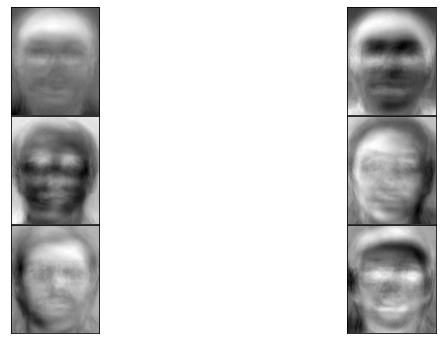

In [17]:
filas = 3
columnas = caras_pca.n_components_ // filas


fig, axes = plt.subplots(
    filas,
    columnas,
    figsize=(12, 6),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={'hspace': 0.01, 'wspace': 0.01, }
)

for i, ax in enumerate(axes.flat):
  ax.imshow(
    caras_pca.components_[i].reshape(112, 92),
    cmap='gray'
  )


Con 6 componentes principales tenes 50% de los datos

In [19]:
caras_pca.n_components_

6

In [21]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

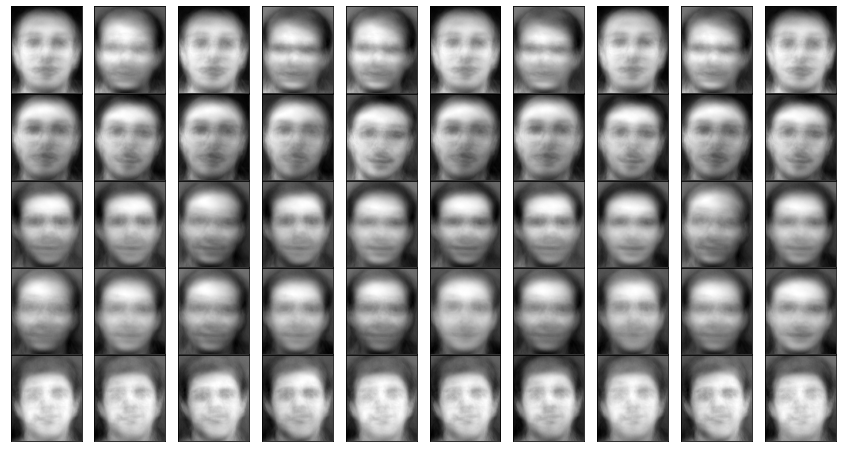

In [24]:
fig, axes = plt.subplots(
    5,
    10,
    figsize=(15, 8),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={'hspace': 0.01, 'wspace': 0.01, }
)

for i, ax in enumerate(axes.flat):
  ax.imshow(
      proyeccion[i].reshape(112, 92),
      cmap='gray'
  )


In [37]:
caras_pca = PCA(n_components=0.8)

caras_pca.fit(caras)
print(caras_pca.n_components_)
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)


44


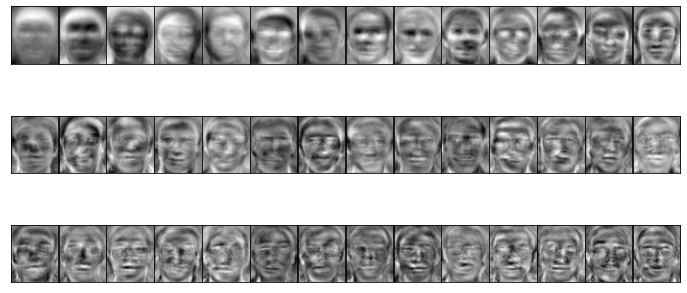

In [38]:
filas = 3
columnas = caras_pca.n_components_ // filas


fig, axes = plt.subplots(
    filas,
    columnas,
    figsize=(12, 6),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={'hspace': 0.01, 'wspace': 0.01, }
)

for i, ax in enumerate(axes.flat):
  ax.imshow(
      caras_pca.components_[i].reshape(112, 92),
      cmap='gray'
  )


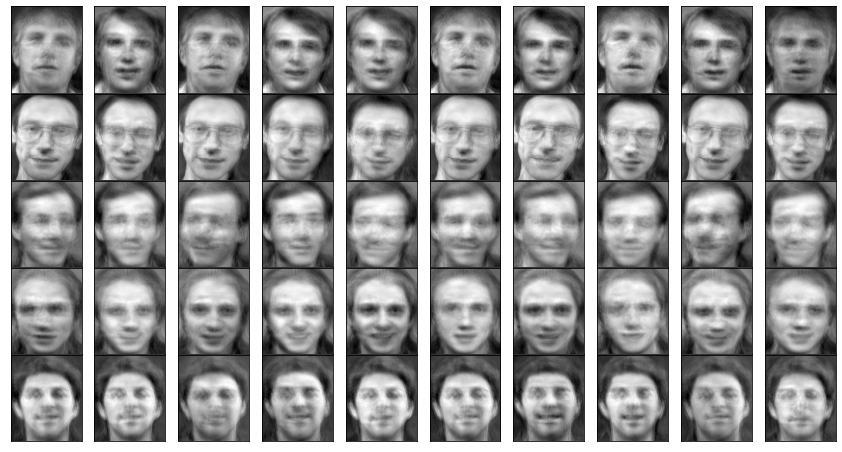

In [39]:
fig, axes = plt.subplots(
    5,
    10,
    figsize=(15, 8),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={'hspace': 0.01, 'wspace': 0.01, }
)

for i, ax in enumerate(axes.flat):
  ax.imshow(
      proyeccion[i].reshape(112, 92),
      cmap='gray'
  )


In [40]:
caras_pca = PCA(n_components=0.999)

caras_pca.fit(caras)
print(caras_pca.n_components_)
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)


388


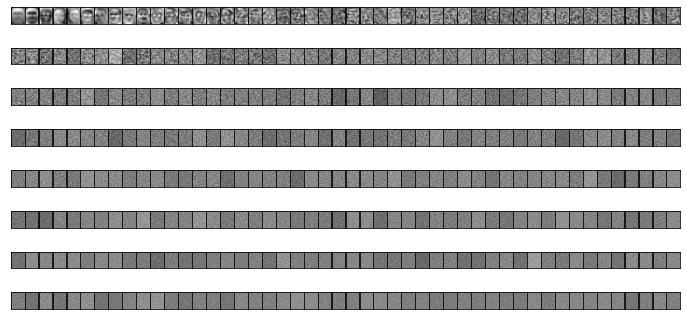

In [41]:
filas = 8
columnas = caras_pca.n_components_ // filas


fig, axes = plt.subplots(
    filas,
    columnas,
    figsize=(12, 6),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={'hspace': 0.01, 'wspace': 0.01, }
)

for i, ax in enumerate(axes.flat):
  ax.imshow(
      caras_pca.components_[i].reshape(112, 92),
      cmap='gray'
  )


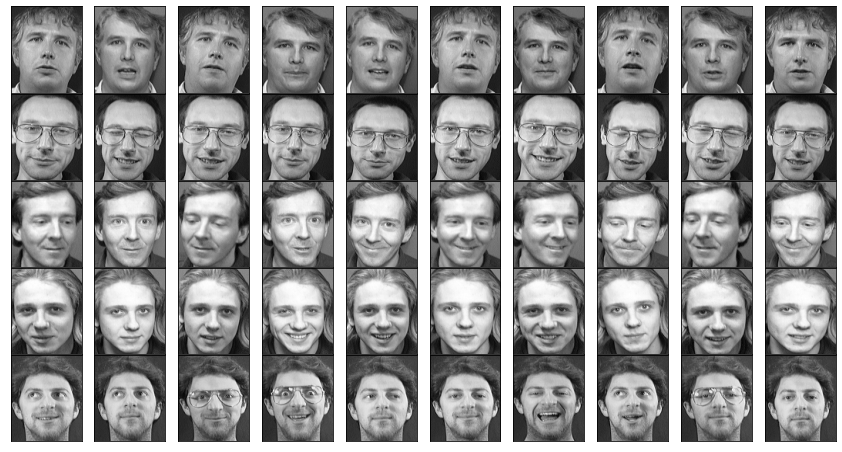

In [42]:
fig, axes = plt.subplots(
    5,
    10,
    figsize=(15, 8),
    subplot_kw={'xticks': [], 'yticks': []},
    gridspec_kw={'hspace': 0.01, 'wspace': 0.01, }
)

for i, ax in enumerate(axes.flat):
  ax.imshow(
      proyeccion[i].reshape(112, 92),
      cmap='gray'
  )
